# TP6 Monte-Carlo (MCMC) Hugo QUENIAT & Aristide LALOUX

<h1 align='center'> Monte-Carlo (MCMC) - TP6 (Homework due April 28 23h59) </h1>
<h4 align='right'><i> author: Hicham Janati </i></h4>


In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

## I - Metropolis-Hastings vs Rejection sampling
We would like to sample from the density function:
$$ f(x) \propto  x^4\exp(- x^2) $$ 
Using the proposal: $g(x) \propto \exp(- \frac{1}{2} x^2) $.

1. Find an empirical bound M so as to apply rejection sampling using g to sample from f and visualize the domination of f by Mg.

We take $M = sup_{x\in  \mathbb{R}} \frac{f(x)}{g(x)}$

Best majoration constant M = 2.1652254894455245


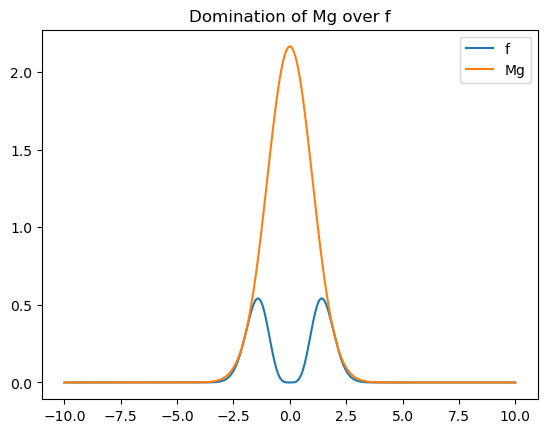

In [2]:
x = np.linspace(-10, 10, 1000)
f = lambda x: np.exp(- x ** 2) * x ** 4
g = lambda x: np.exp(- 0.5 * x ** 2)
r = lambda x: f(x)/g(x)
M=np.max(r(x))

print('Best majoration constant M = ' + str(M))
plt.plot(x,f(x),label='f')
plt.plot(x,M*g(x), label='Mg')
plt.title('Domination of Mg over f')
plt.legend()
plt.show()

2. Implement the rejection sampling algorithm and visualize the empirical histogram against the density f. Use scipy.integration to estimate the normalizing constant of f for accurate visualization of the density.

In [3]:
import random
def rejection_sampling(f,g,M,n):    
    good_samples = []
    while (len(good_samples) < n):
        U = random.uniform(0,1) 
        X = np.random.normal(0,1) #density g
        if U <= f(X)/(M*g(X)) : 
            good_samples.append(X)  
    return good_samples

We know that $X$ has a probability $\frac{1}{M}$ to be accepted in good_samples.

The density of the accepted $X$ is $f$


In [4]:
samples = rejection_sampling(f,g,M,100000)

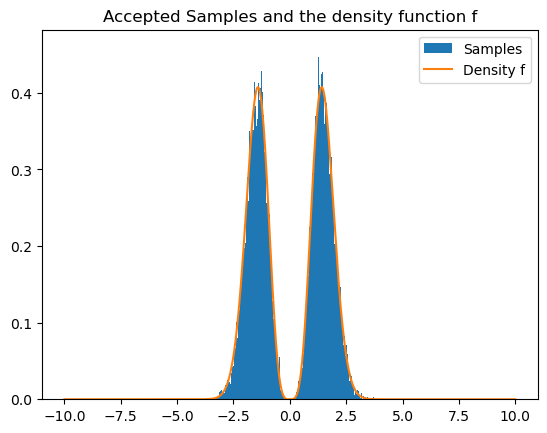

In [5]:
import scipy.integrate as itg

f_samples = [f(x) for x in samples]

norm_f = itg.quad(f, -np.inf,np.inf) 
f_normed = lambda x: f(x)/norm_f[0]

plt.hist(samples, bins=1000, density=True, label="Samples")
plt.plot(x,f_normed(x), label="Density f")

plt.title("Accepted Samples and the density function f")
plt.legend()

plt.show()


In [6]:
histogram, edges = np.histogram(samples, bins=1000, density=True) #histogram contains the weight for a segment between its two edges. And edges contains the edges of the segments of the histogram.
h = edges[1] - edges[0]
integral = h*np.sum(histogram)
print("Approximation of the integral by Histogram = " + str(integral))

Approximation of the integral by Histogram = 1.000000000000021


It works, as we can see our algorithm indeed enables us to sample de density $f$

3. Implement the random walk metropolis hastings algorithm with a Gaussian conditional probability and visualize the empirical histogram against the normalized density f/F

In [7]:
def rw_metropolis_hastings(n, f=f, seed=None):
    """Random walk metropolis hastings algorithm for f with Gaussian proposal g.
    n: int.
        number of samples.
    f: callable.
        density we want to sample from.
    seed: int (optional).
        random seed initialization.
    """
    #Initialization:
    X = 1
    MarkovChain = []
     
    for i in range (n):

        MarkovChain.append(X)
        
        
        Y = np.random.normal(X,1)
        
        
        if f(X) != 0: 
            rho = min( 1, f(Y)/f(X) )
        else : 
            rho = 1
        
       

        W = np.random.binomial(1, rho)
       
        if W == 1:
            X = Y
        else: 
            X = X
        
    return(MarkovChain)



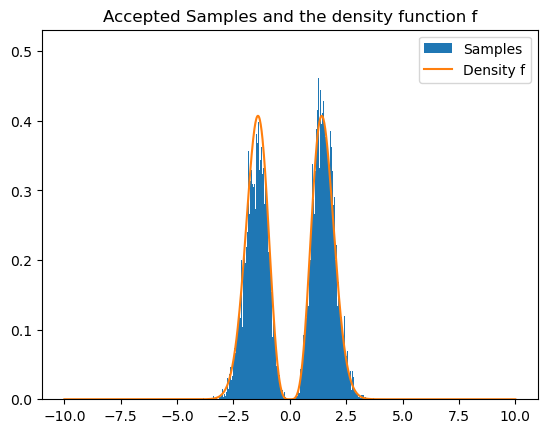

In [8]:
samples = rw_metropolis_hastings(100000, f=f)

norm_f = itg.quad(f, -np.inf,np.inf) 
f_normed = lambda x: f(x)/norm_f[0]

plt.hist(samples, bins=1000, density=True, label="Samples")
plt.plot(x,f_normed(x), label="Density f")

plt.title("Accepted Samples and the density function f")
plt.legend()

plt.show()


In [9]:
histogram, edges = np.histogram(samples, bins=1000, density=True) #histogram contains the weight for a segment between its two edges. And edges contains the edges of the segments of the histogram.
h = edges[1] - edges[0]
integral = h*np.sum(histogram)
print("Approximation of the integral by Histogram = " + str(integral))

Approximation of the integral by Histogram = 0.9999999999999846


As we can see, here again, the random walk metropolis hasting algorithm enables us to sample the density $f$

# II - Gibbs sampling
Gibbs sampling is a Markov Chain sampling algorithm used to sample from a multivariate random variable by sampling each component from its conditional distribution while the others components are fixed.

We would like to sample from a multivariate Gaussian $(X_1, X_2)$ with density:
$$p(x_1, x_2) = \frac{1}{2\pi\sqrt{1 - \rho^2}} \exp\left(- \frac{1}{2(1 - \rho^2)}(x_1^2 + x_2^2 - 2\rho x_1 x_2)\right) $$
*1. Identify the parameters of the distribution and compute the conditional distributions of each component.*

We recognize:

$\Sigma = \begin{pmatrix} 1 & \rho \\ \rho & 1 \end{pmatrix}$ and $\Sigma^{-1} = \frac{1}{1-\rho^2}\begin{pmatrix} 1 & -\rho \\ -\rho & 1 \end{pmatrix}$

We have : 

$$p(x_1, x_2) = \frac{1}{2\pi \det{(\Sigma)}} \exp\left(- \frac{1}{2}(X_1, X_2)\Sigma^{-1}(X_1, X_2)^T\right)$$ 

Hence this is the case of a centered and normalized Gaussian bivariate density:


$$\begin{pmatrix} X_1 \\ X_2 \end{pmatrix} \sim \mathcal{N} \left(\begin{pmatrix} 0 \\ 0 \end{pmatrix}  ,\begin{pmatrix} 1 & \rho \\ \rho & 1 \end{pmatrix} \right)$$

$$\rho = Cov(X_1,X_2)$$

### Conditionnal Densities:

$$p(x_1,x_2) = \frac{1}{2\pi\sqrt{1-\rho^2}} \cdot \exp \left( -\frac{x_1^2 + x_2^2 - 2\rho x_1 x_2}{2(1-\rho^2)} \right)$$

$$= \frac{1}{2\pi\sqrt{1-\rho^2}} \cdot \exp\left( - \frac{(x_1-\rho x_2)^2}{2(1-\rho^2)} \right) \cdot \exp\left(-\frac{x_2^2 - \rho x_2^2}{2(1-\rho^2)} \right)$$

$$= \frac{1}{2\pi\sqrt{1-\rho^2}} \cdot \exp\left( - \frac{(x_1-\rho x_2)^2}{2(1-\rho^2)} \right) \cdot \exp\left(-\frac{x_2^2}{2} \right)$$

$$= \frac{1}{2\pi\sqrt{1-\rho^2}} \cdot \exp\left( - \frac{(x_1-\rho x_2)^2}{2(1-\rho^2)} \right) \cdot p(x_2)$$

Hence : 

$$p(x_1 \mid x_2) = \frac{p(x_1,x_2)}{p(x_2)} = \frac{1}{2\pi\sqrt{1-\rho^2}} \cdot \exp\left( - \frac{(x_1-\rho x_2)^2}{2(1-\rho^2)} \right) $$

This means : 
$\begin{equation}
    X_1 \mid X_2=x_2 \sim \mathcal{N} (\rho x_2, 1-\rho^2)
\end{equation}$

and by symetry: 
$\begin{equation}
    X_2 \mid X_1=x_1 \sim \mathcal{N} (\rho x_1, 1-\rho^2) 
\end{equation}$




*2. Implement the associated Gibbs sampler where each $X_1, X_2$ are sampled sequentially from the conditional distributions.*

In [10]:
def gibbs_sampler(n, rho=0):
    """Gibbs sampler for (X_1, X_2)."""
    #Init:
    
    # We start with X1 = X2 = 0 = expectation of the distribution

    # The initial values of X1 and X2 are completely independant of the final result.
    X1 = 0
    X2 = 0
    
    # Numpy arrray to store the samples
    samples = np.zeros((n, 2))
    
    for k in range (n):

        # Careful, the second paramater is \sigma and not \sigma**2. See the doc
        # Draw X1|X2 using the conditional distribution caculated above
        X1 = np.random.normal(rho*X2, np.sqrt(1-rho**2))
        
        # Draw X2|X1 using the conditional distribution caculated above, note that we use the newly computed X1
        X2 = np.random.normal(rho*X1, np.sqrt(1-rho**2)) 
        
        
        
        # Store the samples
         
        samples[k][0] = X1
        samples[k][1] = X2
    
    return samples

3. Visualize the contour plots of the target distribution and that of the Gibbs Sampler for different values of n. How does it behave with $\rho$ ?

First the target density:

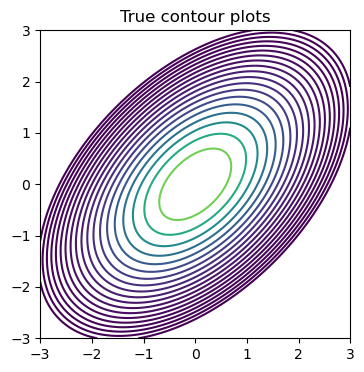

In [11]:
from scipy.stats import multivariate_normal
rho = 0.5
S = np.array([[1, rho], [rho, 1]])
grid = np.linspace(-3, 3, 1000)
x, y = np.meshgrid(grid, grid)
pos = np.empty((1000, 1000, 2))
pos[:, :, 0] = x
pos[:, :, 1] = y
Z_true = multivariate_normal.pdf(pos, mean=[0, 0], cov=S)
plt.figure(figsize=(4, 4))
plt.contour(x, y, Z_true, levels=np.logspace(-2, 0., 20) * Z_true.max())
plt.title("True contour plots")
plt.show()


Text(0.5, 0.98, 'Gibbs Sampler for different values of n and rho')

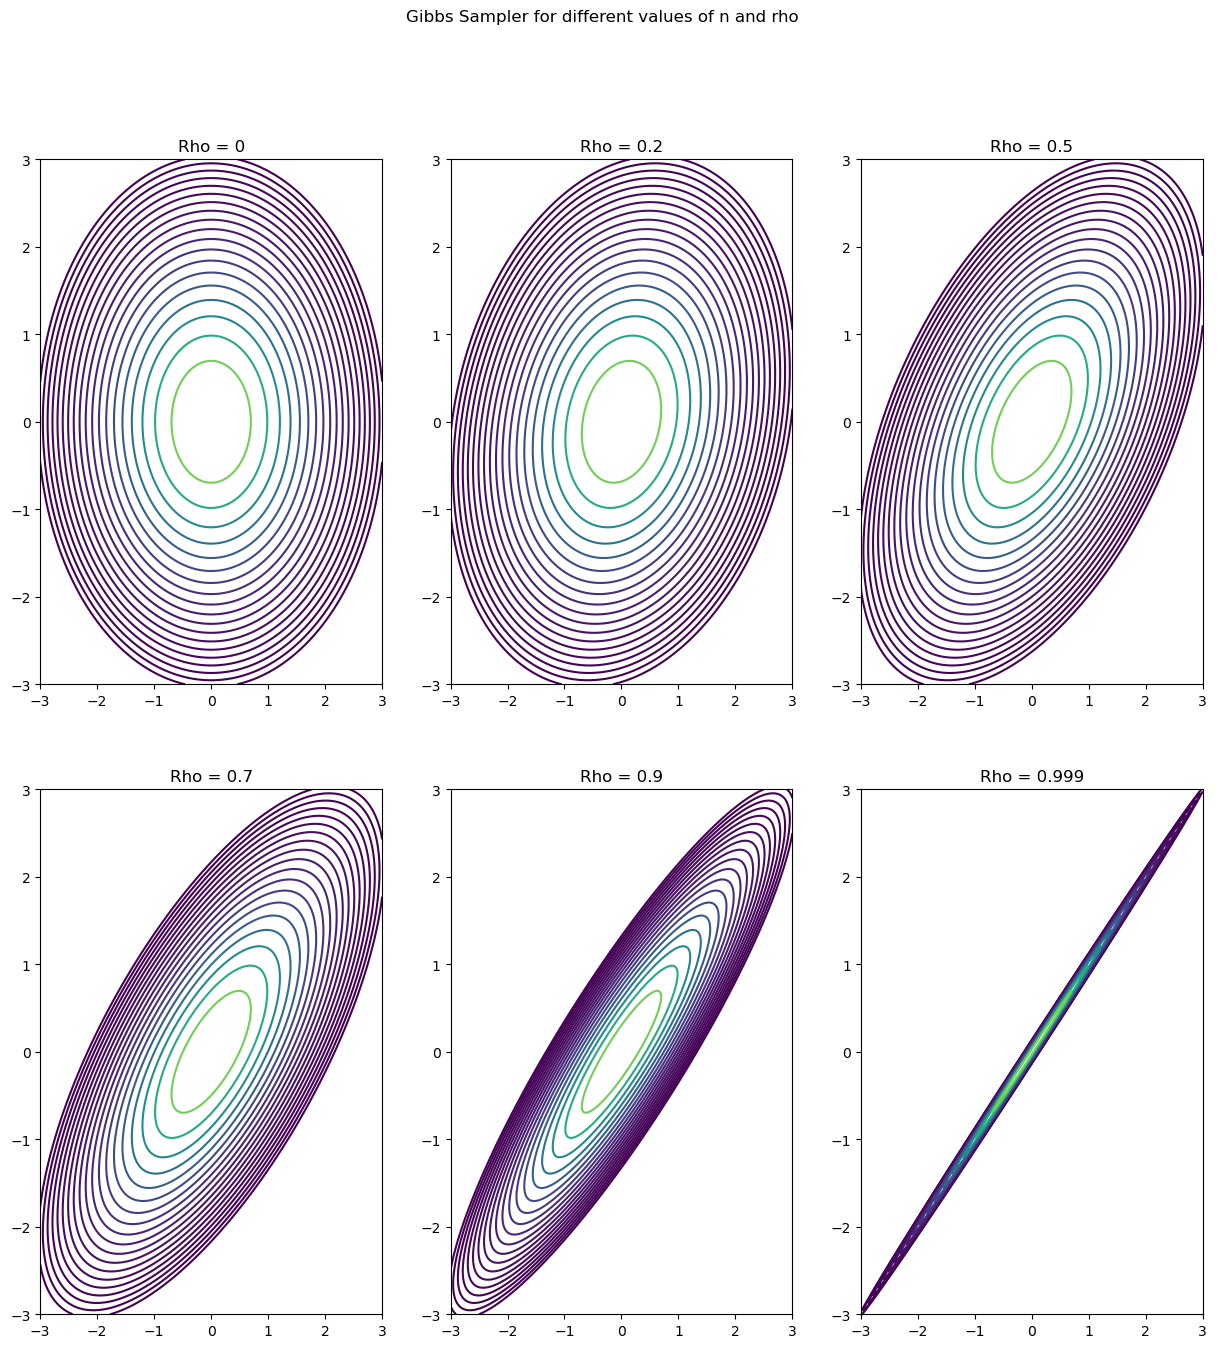

In [12]:
fig, axs = plt.subplots(2,3, figsize=(15,15))

parameters = [0,0.2,0.5,0.7,0.9,0.999] #rho

for ax, i in zip(axs.flat, range(len(parameters))):

    rho = parameters[i]
    S = np.array([[1, rho], [rho, 1]])
    grid = np.linspace(-3, 3, 1000)
    x, y = np.meshgrid(grid, grid)
    pos = np.empty((1000, 1000, 2))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    Z_true = multivariate_normal.pdf(pos, mean=[0, 0], cov=S)
    ax.contour(x, y, Z_true, levels=np.logspace(-2, 0., 20) * Z_true.max())
    ax.set_title(f"Rho = {rho}")

fig.suptitle('Gibbs Sampler for different values of n and rho')



When $\rho=0$ i.e $X_1, X_2$  are not-corrolated we can see that the density function is a perfect circle. We have a circle because $X_1, X_2$ are orthogonal for the inner product $<X_1,X_2> = Cov(X_1,X_2) = 0$ Therefore, $X_1$ and $X_2$ are pointing in two orthogonal direction.

As $\rho$ increases to $1-\epsilon$, $Cov(X_1,X_2)$ gets higher. The geometrical consequence of this is that $X_1$ and $X_2$ are pointing more and more in the same direction.

Now we plot the contour plots as the Markov chain moves. Keep in mind that the Markov chain samples are correlated and therefore not iid ! We need to wait a whiler until the MC reaches the stationary distribution. We show this in the following plots:
First we plot everything till a certain iteration:

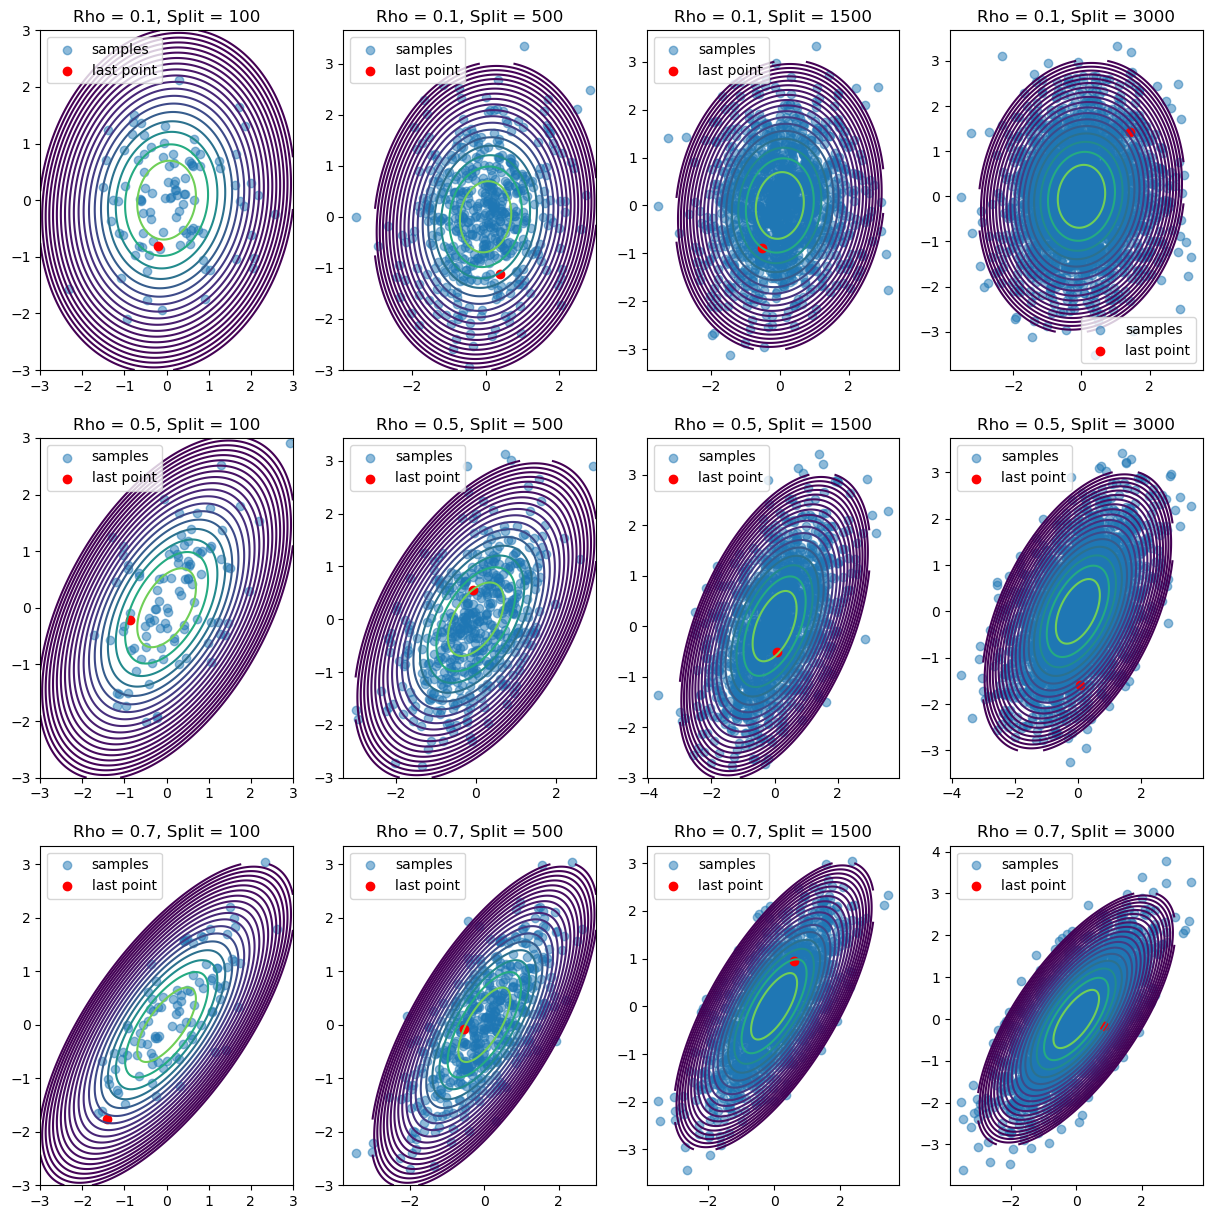

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

fig, axs = plt.subplots(3, 4, figsize=(15, 15))
rho = [0.1, 0.5, 0.7] #rho
n = 3000
split = [100, 500, 1500, 3000]

samples = []
for k in range(len(rho)):
    temp = gibbs_sampler(n+1, rho=rho[k])
    samples.append(temp)

for i in range(len(rho)):
    for j in range(len(split)):
        ax = axs[i, j]
        ax.scatter(samples[i][:split[j], 0], samples[i][:split[j], 1], alpha=0.5, label="samples")
        ax.scatter(samples[i][split[j],0], samples[i][split[j],1], color="red", label="last point")
        ax.legend()
        
        rhoi = rho[i]
        S = np.array([[1, rhoi], [rhoi, 1]])
        grid = np.linspace(-3, 3, 3000)
        x, y = np.meshgrid(grid, grid)
        pos = np.empty((3000, 3000, 2))
        pos[:, :, 0] = x
        pos[:, :, 1] = y
        Z_true = multivariate_normal.pdf(pos, mean=[0, 0], cov=S)

        ax.contour(x, y, Z_true, levels=np.logspace(-2, 0., 20) * Z_true.max())
        ax.set_title(f"Rho = {rhoi}, Split = {split[j]}")


plt.show()


As we can see the repartition of the points overlaps well the contour of the target density function $f$. We have a bigger concentration of points in the middle of the graph since the density is bigger around the expectation which is $\mathbb{E}[(X_1,X_2)] = (0,0)$

Our Markov Chain samples well the density $f$

4. Using the numpy corrcoef function, plot the auto-correlation values as a function of the lag: $corr(X_t, X_{t - lag})$

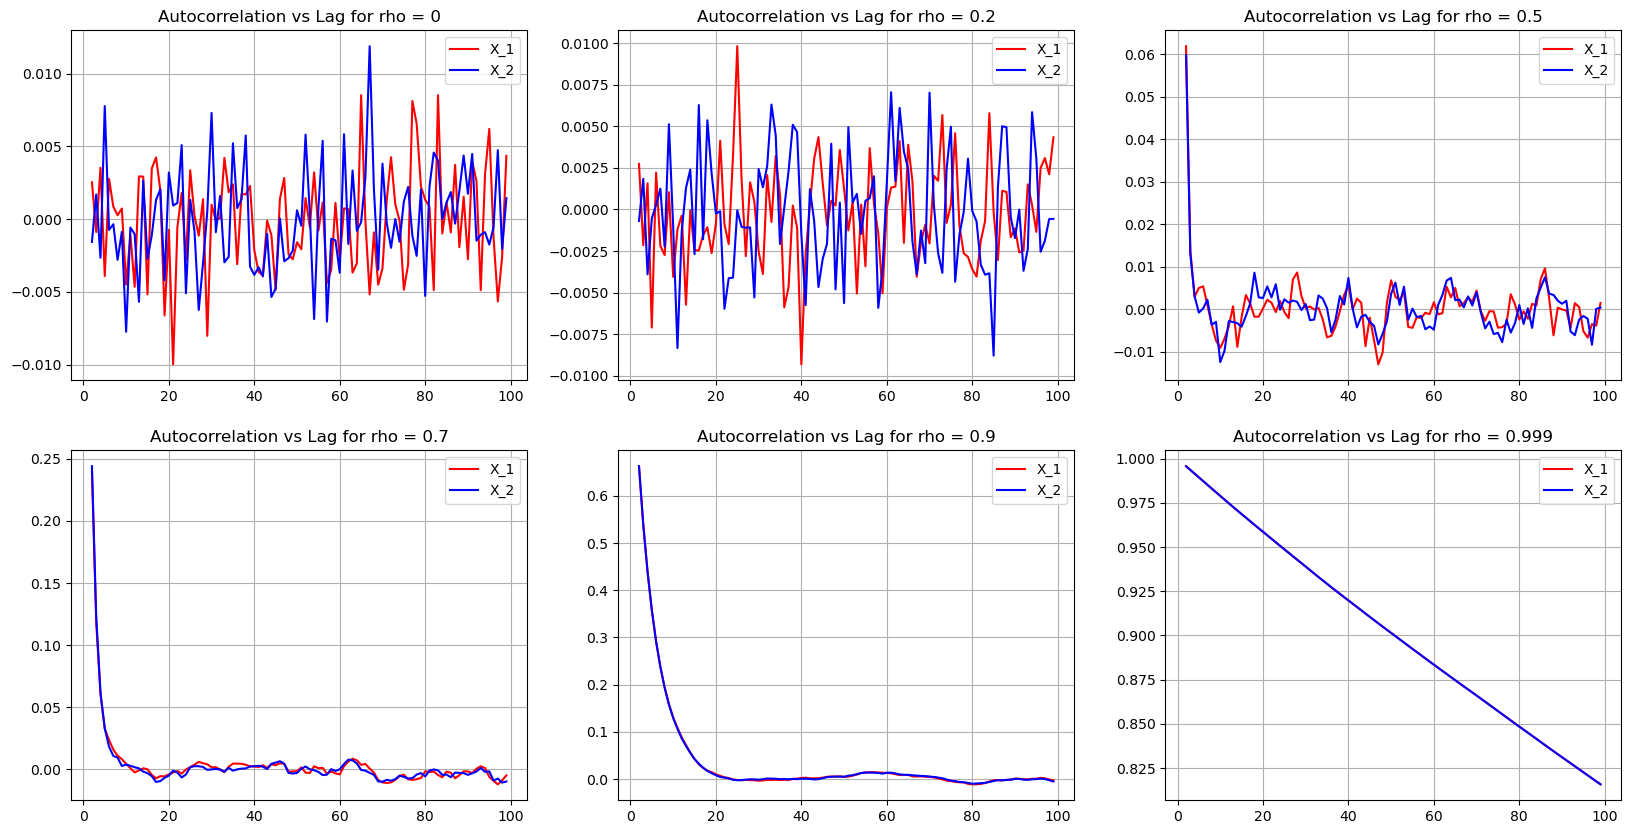

In [14]:
# Plotting the auto-correlation values as a function of the lag

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
rho = [0,0.2,0.5,0.7,0.9,0.999] #rho
i = 0

# Lags to consider, we do not consider lag = 1 because the value is too high and it would make the plot unreadable
# It is useless to consider a lag that is greater than 100 since the graph is the same.
lags = np.arange(2, 100,1)

for j in range(len(rho)):
    
    # Draw samples from the Gibbs sampler with the appropriate rho
    samples = gibbs_sampler(100000, rho=rho[j])
    
    # Storage for the auto-correlation values
    auto_corr_X1 = []
    auto_corr_X2 = []
    l = j%3
    for k in lags:
        # Compute and store the auto-correlation values for either X_1 or X_2 depending on which variable you want to focus on
        auto_corr_X1.append(np.corrcoef(samples[:-100, 0], samples[k:-100+k, 0], rowvar=False)[0, 1])
        auto_corr_X2.append(np.corrcoef(samples[:-100, 1], samples[k:-100+k, 1], rowvar=False)[0, 1])
    axs[i,l].plot(lags, auto_corr_X1, color="red", label="X_1")
    axs[i,l].plot(lags, auto_corr_X2, color="blue", label="X_2")
    axs[i,l].grid()
    axs[i,l].set_title(f"Autocorrelation vs Lag for rho = {rho[j]}")
    axs[i,l].legend()
    if j%3 == 2:
        i += 1
plt.show()

5. Using what you observe, propose two arguments to add to your Gibbs sampler function to improve the simulation.
What happens when $\rho \to 1$ ?

We observe that for a low lag with have a higher correlation between samples than for a high lag. Thus, we can think of 2 arguments to improve the simulation:
- The first one is to ask for an integer **skip**, meaning that the first skip samples will be ignored. This is an idea because the first samples are still quite highly correlated to the initialization point of the Markov Chain so they are not really representative of the stationary distribution.
- The second one is to ask for another integer **step**, meaning that, for the drawing, we only take one variable each **step**. This is an idea because the samples are correlated so we can think that taking only one variable each **step** will reduce the correlation between samples.

When $\rho \to 1$, the correlation between $X_1$ and $X_2$ increases. This means that the Markov Chain will take more time to reach the stationary distribution. This is what we observe in the plots. This is logical because when $\rho \to 1$, the variances of the conditional distributions becomes close to 0. As a result, the Markov Chain takes more time to move from one point to another.

In [15]:
def gibbs_sampler_improved(n, skip, step, rho=0):
    """Gibbs sampler for (X_1, X_2)."""
    #Init:
    
    # We start with X1 = X2 = 0 = expectation of the distribution
    X1 = 0
    X2 = 0
    
    # Numpy arrray to store the samples
    samples = np.zeros((n, 2))
    
    for k in range (skip):


        # Draw X1|X2 using the conditional distribution caculated above
        X1 = np.random.normal(rho*X2, np.sqrt(1-rho**2))
        
        # Draw X2|X1 using the conditional distribution caculated above, note that we use the newly computed X1
        X2 = np.random.normal(rho*X1, np.sqrt(1-rho**2)) 
        
        # Careful, the second paramater is \sigma and not \sigma**2. See the doc
        
    i = 0
    while i<n:
        for k in range(step):
            # Draw X1|X2 using the conditional distribution cacultaed above
            X1 = np.random.normal(rho*X2, np.sqrt(1-rho**2))
            # Draw X2|X1 using the conditional distribution cacultaed above, note that we use the newly computed X1
            X2 = np.random.normal(rho*X1, np.sqrt(1-rho**2)) 
        
        # Store the samples in the numpy array every step iterations
        samples[i, 0] = X1
        samples[i, 1] = X2
        i+=1
    
    return samples

6. Implement a Random Walk metropolis algorithm to simulate from p using a conditional proposal $\mathcal N(0, \tau I_2)$ and vary $\tau$. 

In [16]:
def rw_metropolis_hastings2(n, f, tau=1., seed=None):
    """Random walk metropolis hastings algorithm for f with Gaussian proposal g."""
    
    # Initialization
    
    if seed is not None:
        np.random.seed(seed)
    
    X = np.random.normal(size=2)
    MC = [X]
    
    for i in range(n):
        
        Y = np.random.multivariate_normal(X, tau*np.eye(2))
        
        if f(X) != 0:
            rho = min(1, f(Y)/f(X))
        else:
            rho = 1
            
        W = np.random.binomial(1, rho)
        
        if W == 1:
            X = Y
        else:
            X = X
            
        MC.append(X)
        
    return MC
    
    

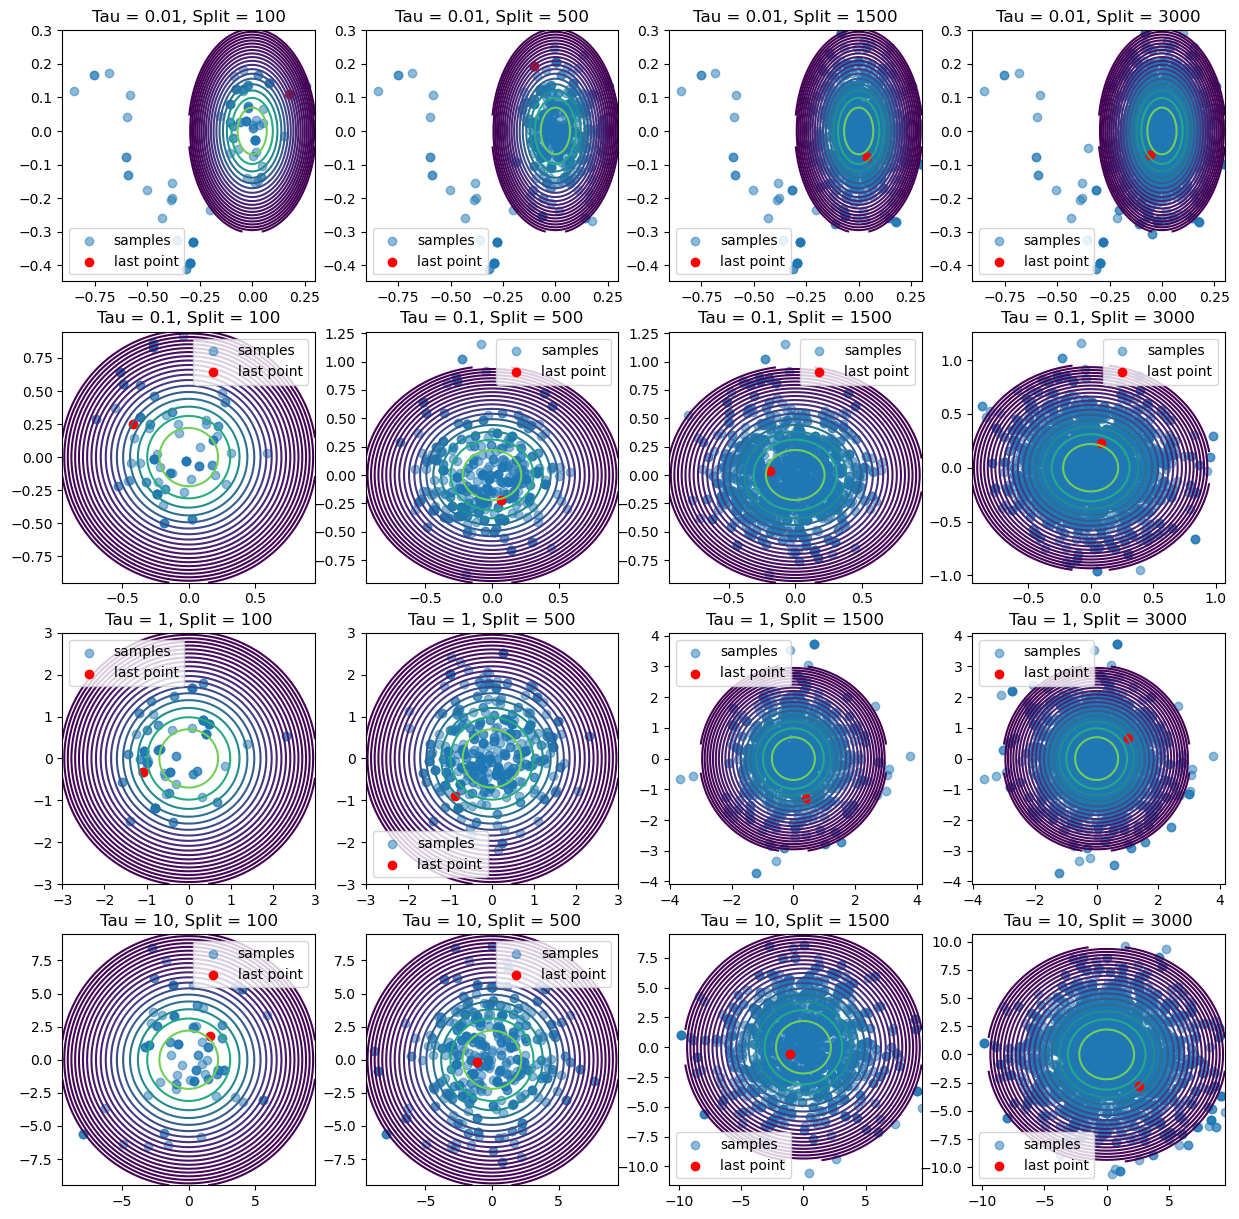

In [17]:

fig, axs = plt.subplots(4, 4, figsize=(15, 15))
tau = [0.01, 0.1, 1, 10]
n = 3000
split = [100, 500, 1500, 3000]

samples = []
for k in range(len(tau)):
    
    def target_density(x):
        """Target density function"""
        return 1/(2*np.pi*tau[k]) * np.exp(-np.linalg.norm(x)**2/(2*tau[k]))
    
    temp = rw_metropolis_hastings2(n, target_density, tau=tau[k])
    samples.append(temp)
    
samples = np.array(samples)

for i in range(len(tau)):
    for j in range(len(split)):
        
        ax = axs[i, j]
        ax.scatter(samples[i][:split[j], 0], samples[i][:split[j], 1], alpha=0.5, label="samples")
        ax.scatter(samples[i][split[j],0], samples[i][split[j],1], color="red", label="last point")
        ax.legend()
        

        S = tau[i] * np.eye(2)
        lim = 3 * np.sqrt(tau[i])
        grid = np.linspace(-lim,lim, 3000)
        x, y = np.meshgrid(grid, grid)
        pos = np.empty((3000, 3000, 2))
        pos[:, :, 0] = x
        pos[:, :, 1] = y
        Z_true = multivariate_normal.pdf(pos, mean=[0, 0], cov=S)

        ax.contour(x, y, Z_true, levels=np.logspace(-2, 0., 20) * Z_true.max())
        ax.set_title(f"Tau = {tau[i]}, Split = {split[j]}")


plt.show()


This is the case where $(X_1,X_2)$ are not correlated since the covariance is null. 

We have $Var(X_1) = Var(X_2) = \tau$

When $\tau$ is high, it means that the density is more spread.

As we can see, when the number of iterations is high, our Markov Chain generated by the rw metropolis hastings algorithm samples well the density of $X=(X_1,X_2)$ 

We can say that because the Markov Chain overlaps well the contour of the density function